## Exploratory Data Analysis

In [2]:
# Install Dependencies

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import plotly.express as px

In [3]:
df = pd.read_csv(os.path.join("data", "train_u6lujuX_CVtuZ9i.csv"))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("Dimensions:", df.shape)

Dimensions: (614, 13)


In [5]:
df.info()
df['Loan_Status'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [6]:
df.isnull().sum()
# df.isnull().mean().sort_values(ascending=False)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe(include='all')
# df.nunique()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### Numerical Graphs

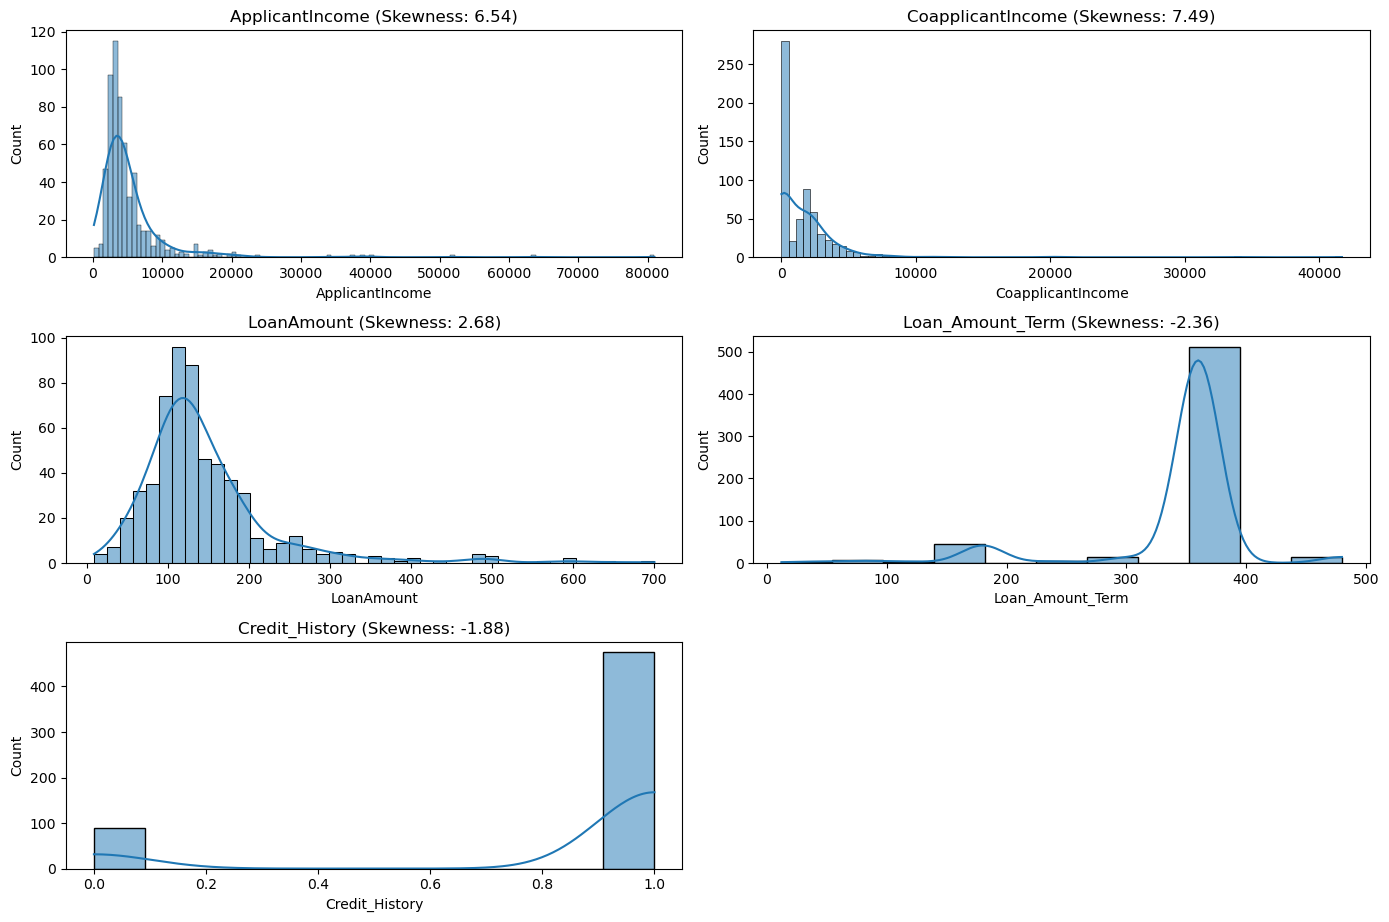

In [7]:
numerical_col = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_col) * 3))
for idx, feat in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col), 2, idx)
    sns.histplot(df[feat], kde=True)
    plt.title(f"{feat} (Skewness: {round(df[feat].skew(), 2)})")

plt.tight_layout()
plt.show()

# 0s in CoapplicationIncome
# Extreme outliers in ApplicationIncome, CoapplicationIncome, and LoanAmount

<Figure size 640x480 with 0 Axes>

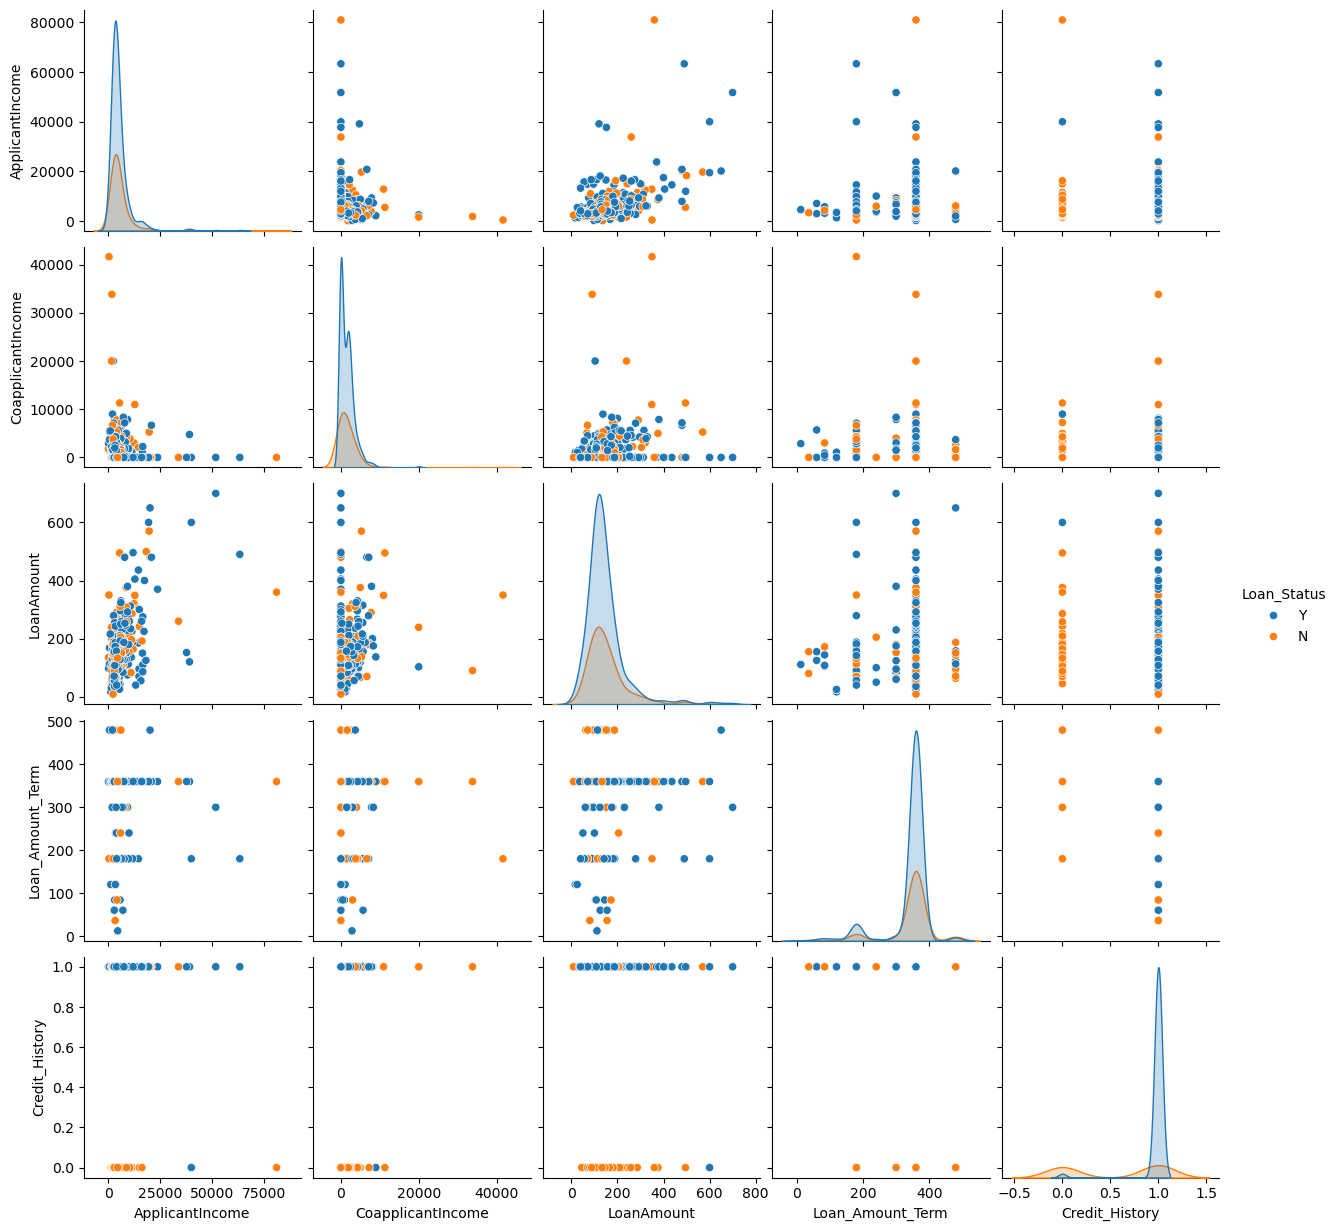

In [6]:
plt.figure()
sns.pairplot(df, hue="Loan_Status")
plt.show()

# Credit_History and Loan_Status have a strong correlation 
# ApplicationIncome and CoapplicationIncome have a strong correlation

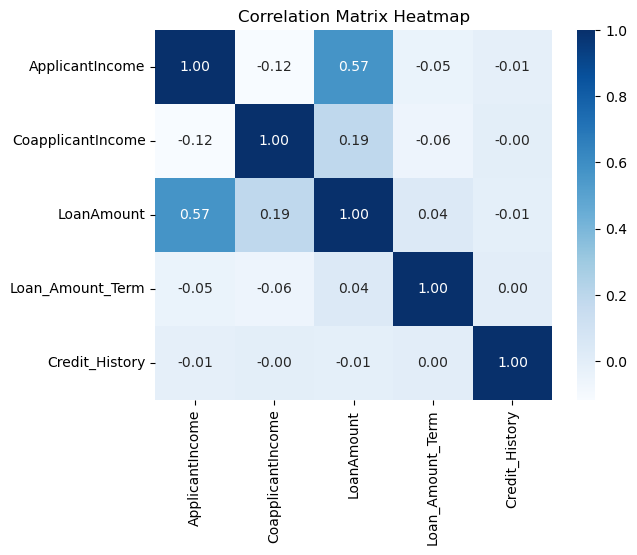

In [44]:
plt.figure()
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

# ApplicationIncome and LoanAmount have a strong correlation

### Categorical

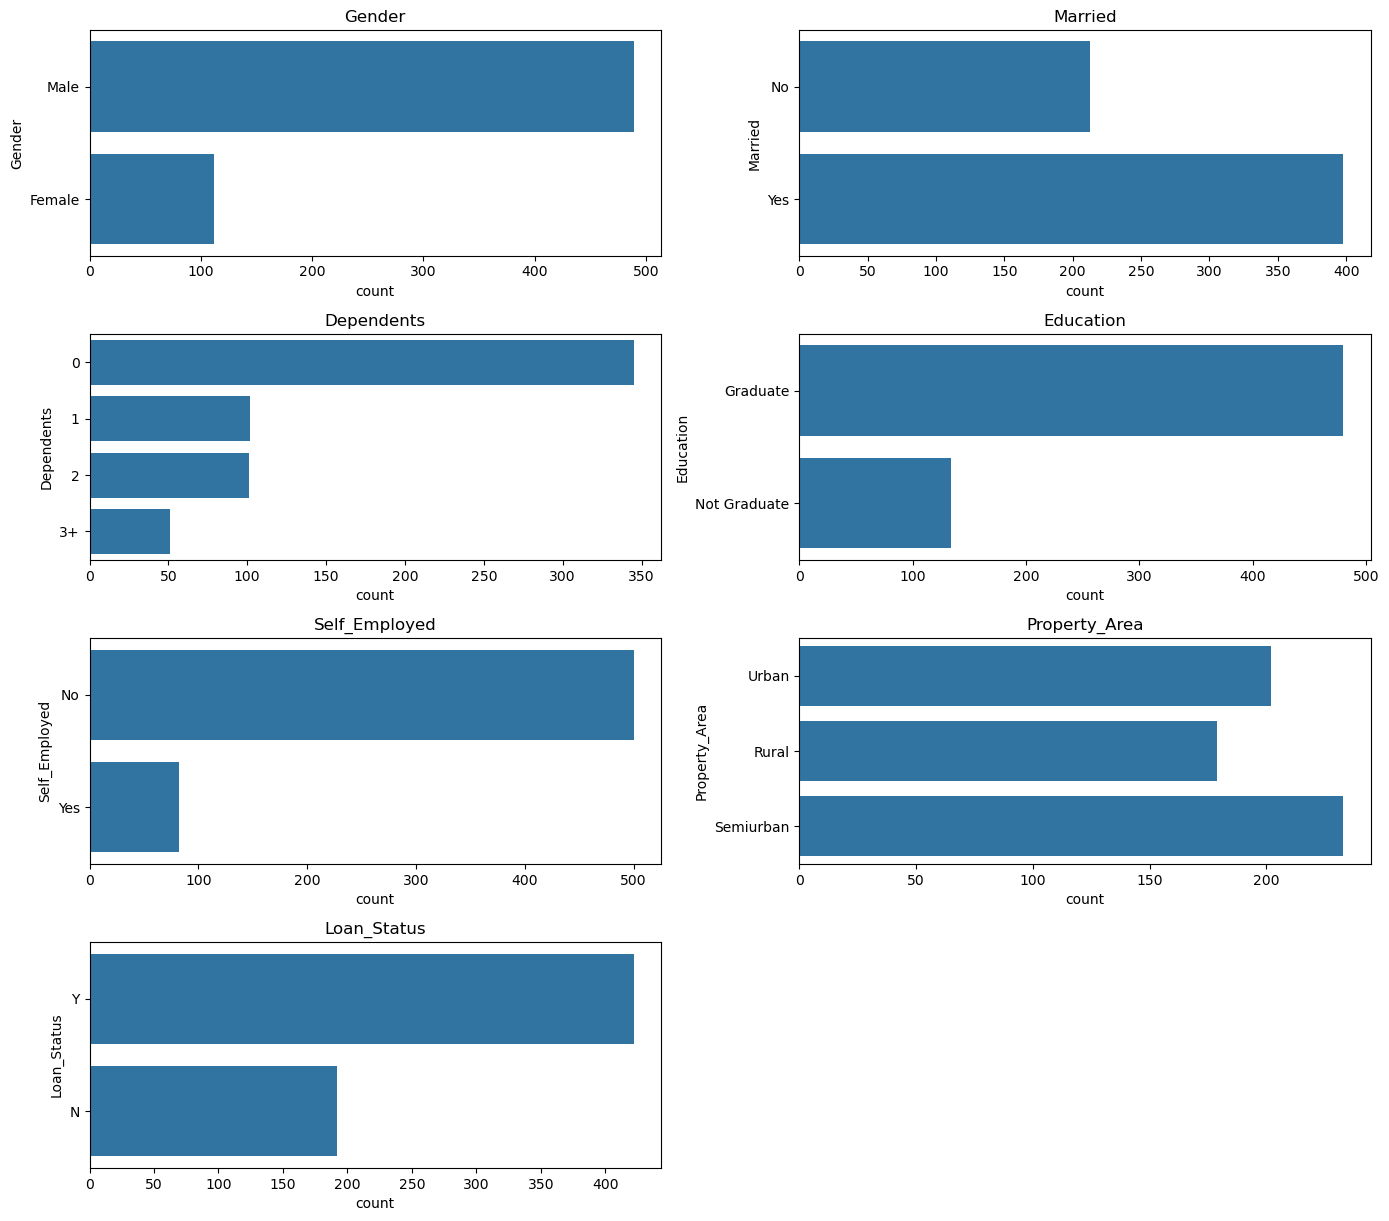

In [30]:
categorical_col = df.select_dtypes(include="object").drop('Loan_ID', axis=1).columns
plt.figure(figsize=(14, len(categorical_col) * 3))
for idx, feat in enumerate(categorical_col, 1):
    plt.subplot(len(categorical_col), 2, idx)
    sns.countplot(df[feat])
    plt.title(feat)

plt.tight_layout()

In [50]:
categorical_col = df.select_dtypes(include="object").drop(['Loan_ID', 'Loan_Status'], axis=1).columns
for feat in categorical_col:
    ct = pd.crosstab(df[feat], df['Loan_Status'], normalize='index')
    chi2, p, dof, ex = chi2_contingency(ct)
    print(f'Chi-Square Test for {feat} vs Loan_Status:')
    print(f'  p-value = {p:.4f}')
    print(f'  Significant at 0.05? {"Yes" if p < 0.05 else "No"}\n')

Chi-Square Test for Gender vs Loan_Status:
  p-value = 1.0000
  Significant at 0.05? No

Chi-Square Test for Married vs Loan_Status:
  p-value = 1.0000
  Significant at 0.05? No

Chi-Square Test for Dependents vs Loan_Status:
  p-value = 0.9983
  Significant at 0.05? No

Chi-Square Test for Education vs Loan_Status:
  p-value = 1.0000
  Significant at 0.05? No

Chi-Square Test for Self_Employed vs Loan_Status:
  p-value = 1.0000
  Significant at 0.05? No

Chi-Square Test for Property_Area vs Loan_Status:
  p-value = 0.9716
  Significant at 0.05? No



In [15]:
categorical_col = df.select_dtypes(include="object").drop(['Loan_ID'], axis=1).columns
# categorical_col = ['Property_Area', 'Loan_Status']
df_subset = df[categorical_col].dropna()
fig = px.parallel_categories(df_subset)
fig.show()

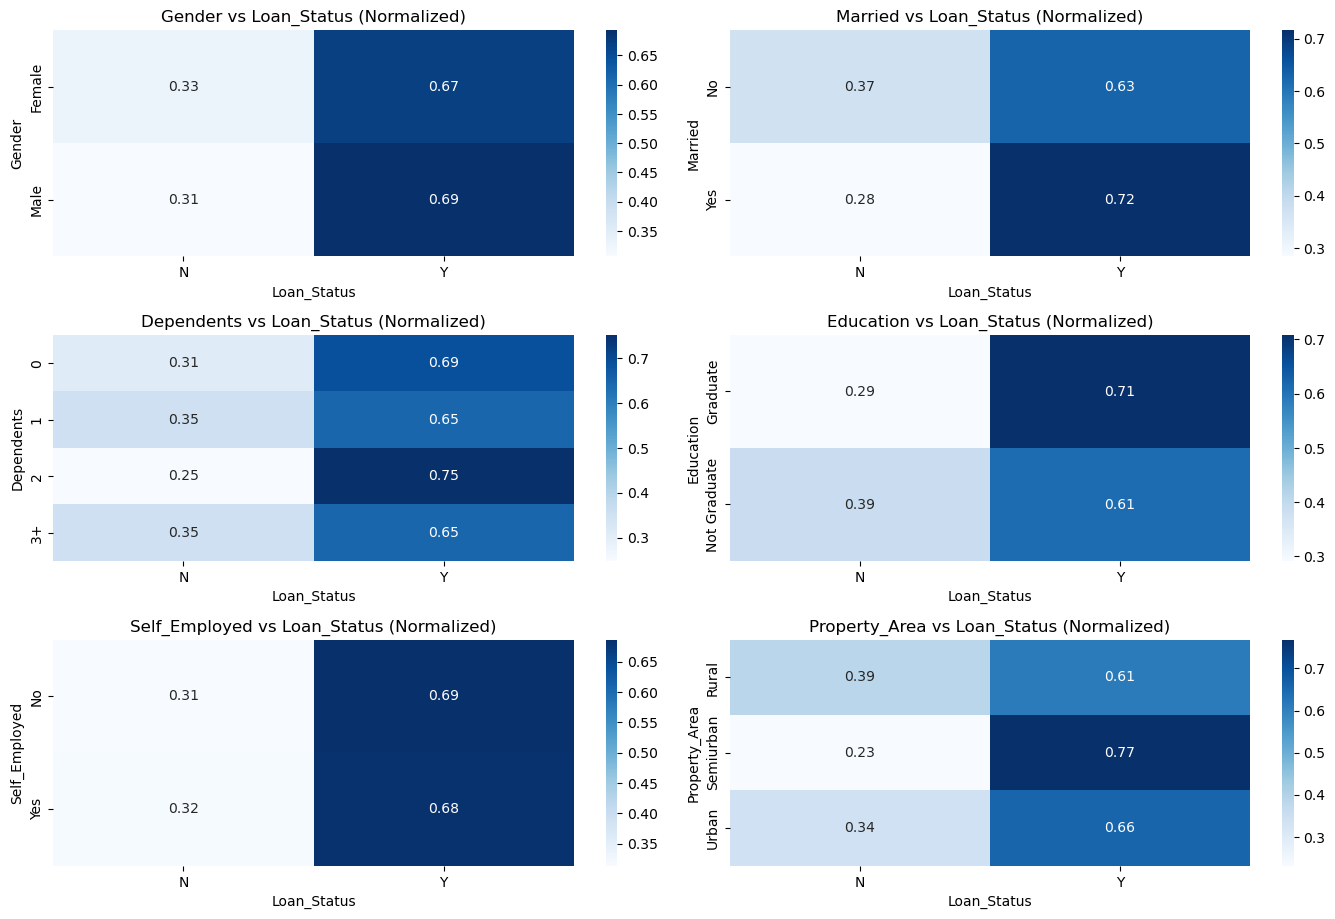

In [31]:
categorical_col = df.select_dtypes(include="object").drop(['Loan_ID', 'Loan_Status'], axis=1).columns.tolist()

plt.figure(figsize=(14, len(categorical_col) * 3))
for idx, col in enumerate(categorical_col, 1):
    plt.subplot(len(categorical_col), 2, idx)
    ct = pd.crosstab(df[col], df['Loan_Status'], normalize='index')
    sns.heatmap(ct, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"{col} vs Loan_Status (Normalized)")
    plt.ylabel(col)

plt.tight_layout()

In [ ]:
df['Loan_Status'].value_counts(normalize=True)

# Self_Employed and Gender seems to have 0 correlation with Loan_Status

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64